In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('seeds_dataset.csv',header = None,delimiter = '\t+',names = ['Area','Perimeter','Compactness','length_of_kernel','width_of_kernel','asymmertry_coeff','length_of_kernel_groove','type_of_seed'])

C:\Users\narah\AppData\Local\Temp\ipykernel_12380\885877468.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('seeds_dataset.csv',header = None,delimiter = '\t+',names = ['Area','Perimeter','Compactness','length_of_kernel','width_of_kernel','asymmertry_coeff','length_of_kernel_groove','type_of_seed'])


In [3]:
df.head()

,Area,Perimeter,Compactness,length_of_kernel,width_of_kernel,asymmertry_coeff,length_of_kernel_groove,type_of_seed
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
df.isna().sum()

Area                       0
Perimeter                  0
Compactness                0
length_of_kernel           0
width_of_kernel            0
asymmertry_coeff           0
length_of_kernel_groove    0
type_of_seed               0
dtype: int64

In [5]:
df['Area'].unique

<bound method Series.unique of 0      15.26
1      14.88
2      14.29
3      13.84
4      16.14
       ...  
205    12.19
206    11.23
207    13.20
208    11.84
209    12.30
Name: Area, Length: 210, dtype: float64>

In [6]:
df.head()

,Area,Perimeter,Compactness,length_of_kernel,width_of_kernel,asymmertry_coeff,length_of_kernel_groove,type_of_seed
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [7]:
x = df.drop(columns=['type_of_seed'])
y = df['type_of_seed']

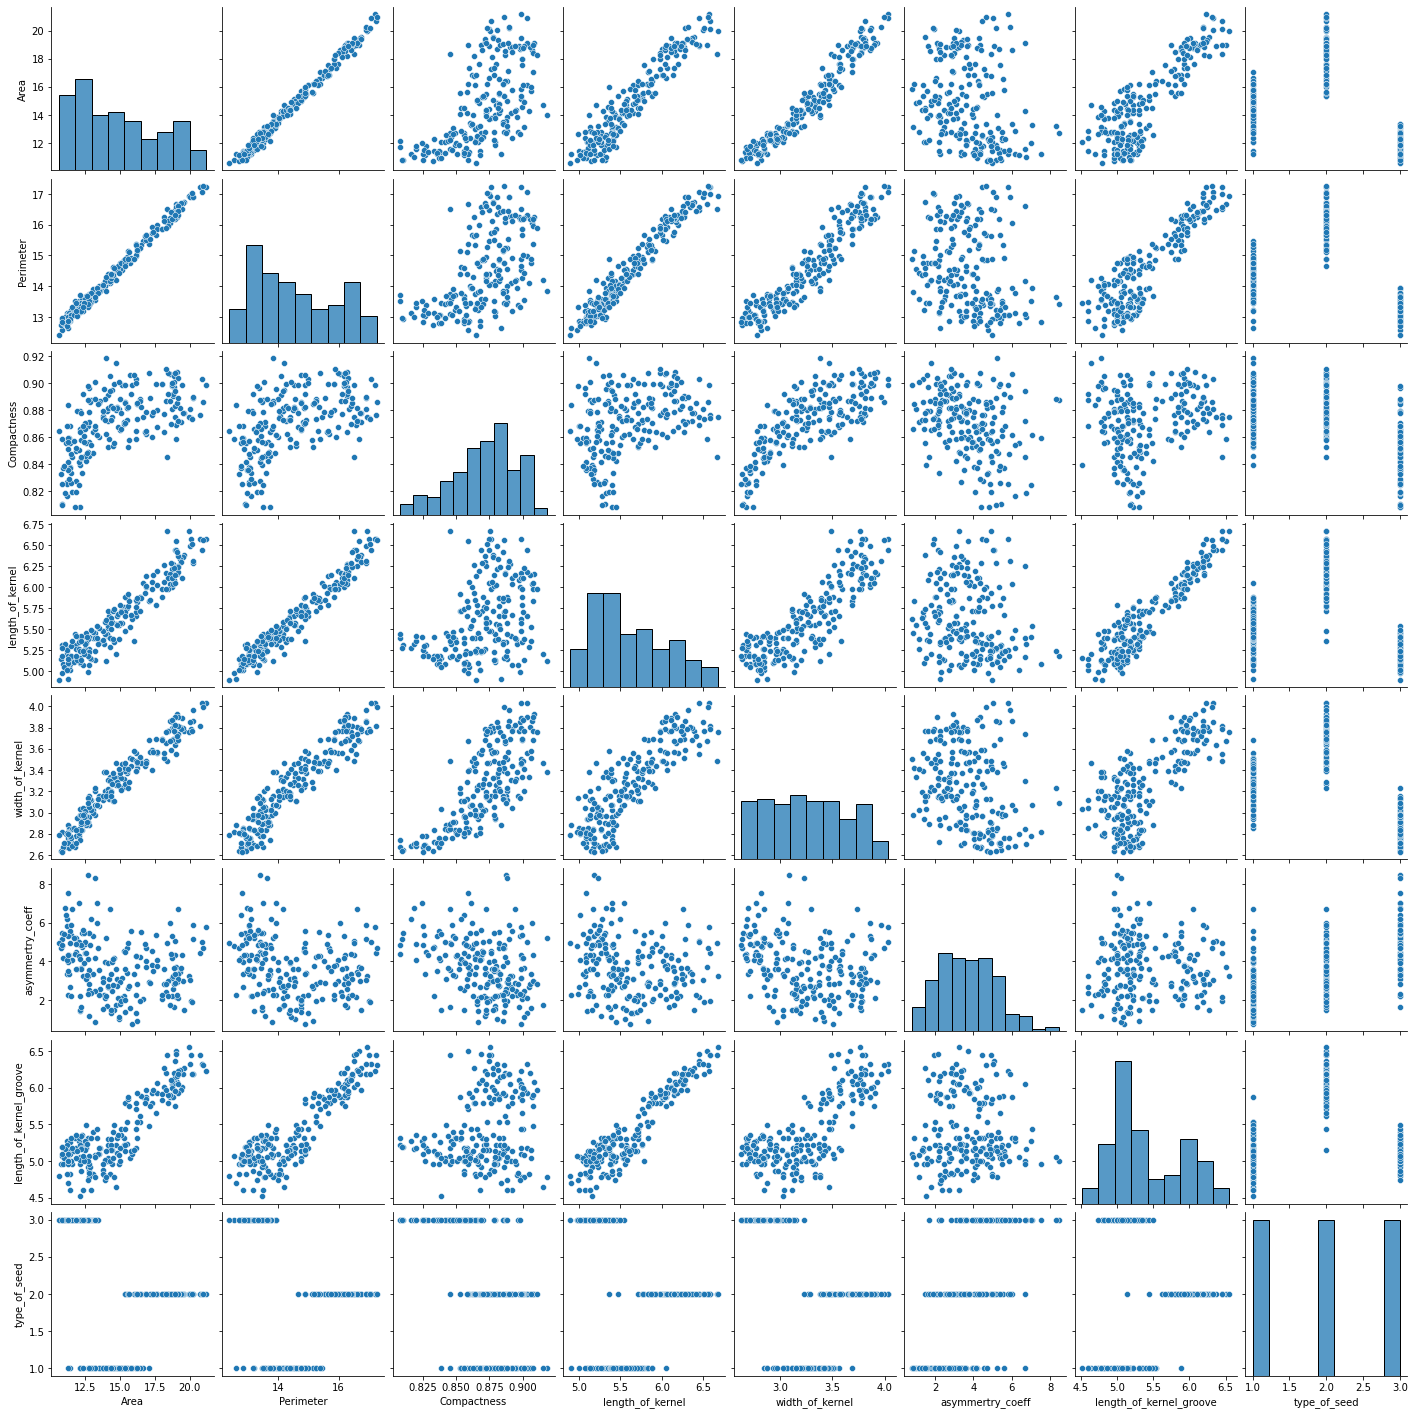

In [8]:
import seaborn as sns
sns.pairplot(df)

In [9]:
cr = np.corrcoef(df.values.T)
cr

array([[ 1.        ,  0.99434093,  0.60828842,  0.94998542,  0.9707706 ,
        -0.22957233,  0.86369275, -0.34605787],
       [ 0.99434093,  1.        ,  0.52924361,  0.97242233,  0.94482936,
        -0.21734037,  0.8907839 , -0.3278997 ],
       [ 0.60828842,  0.52924361,  1.        ,  0.36791515,  0.76163452,
        -0.33147087,  0.22682482, -0.53100702],
       [ 0.94998542,  0.97242233,  0.36791515,  1.        ,  0.86041494,
        -0.17156243,  0.93280609, -0.2572687 ],
       [ 0.9707706 ,  0.94482936,  0.76163452,  0.86041494,  1.        ,
        -0.25803655,  0.74913147, -0.42346287],
       [-0.22957233, -0.21734037, -0.33147087, -0.17156243, -0.25803655,
         1.        , -0.01107902,  0.57727271],
       [ 0.86369275,  0.8907839 ,  0.22682482,  0.93280609,  0.74913147,
        -0.01107902,  1.        ,  0.02430104],
       [-0.34605787, -0.3278997 , -0.53100702, -0.2572687 , -0.42346287,
         0.57727271,  0.02430104,  1.        ]])

<AxesSubplot:>

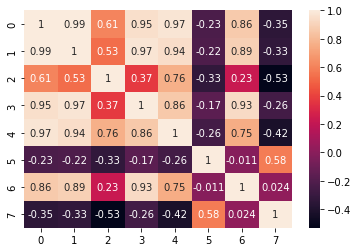

In [10]:
import seaborn as sns
sns.heatmap(cr,annot=True)

In [11]:
x.shape

(210, 7)

In [12]:
y.shape

(210,)

# Support Vector Machine

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
params_svm = {'C':[0.1,1,10,100],'kernel':['linear','rbf','poly'],'gamma':['scale','auto'],'decision_function_shape':['ovo','ovr']}
grid_svm = GridSearchCV(SVC(),params_svm)

In [14]:
from sklearn.model_selection import cross_validate
cv_svm = cross_validate(grid_svm,x,y,cv=5)

In [15]:
cv_svm

{'fit_time': array([1.31631851, 0.93383408, 1.05365777, 1.2137022 , 0.79594135]),
 'score_time': array([0.        , 0.00309753, 0.00331998, 0.00043249, 0.        ]),
 'test_score': array([1.        , 0.92857143, 0.92857143, 0.97619048, 0.73809524])}

In [16]:
cv_svm['test_score'].mean()

0.9142857142857143

# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
params_dt = {'criterion':['gini','entropy','log_loss'],'splitter':['best','random'],'max_depth':[2,3,4],}
grid_dt = GridSearchCV(DecisionTreeClassifier(),params_dt,error_score='raise')

In [18]:
cv_dt = cross_validate(grid_dt,x,y,cv=5)

In [19]:
cv_dt

{'fit_time': array([0.28596091, 0.24774742, 0.23422933, 0.26048446, 0.25754309]),
 'score_time': array([0.00206208, 0.        , 0.        , 0.        , 0.        ]),
 'test_score': array([0.9047619 , 0.9047619 , 0.83333333, 0.95238095, 0.71428571])}

In [20]:
cv_dt['test_score'].mean()

0.8619047619047618

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
params_lr = {'solver':['liblinear','newton-cg','newton-cholesky','sag','saga'],'multi_class':['auto','ovr','multinomial']}
grid_lr = GridSearchCV(LogisticRegression(),params_lr)

In [22]:
cv_lr = cross_validate(grid_lr,x,y,cv=5)

C:\Users\narah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\narah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\narah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\narah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\narah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\narah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\narah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\narah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\narah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\narah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\narah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\narah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\narah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\narah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\narah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\narah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\narah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\narah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\narah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\narah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\narah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\narah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\narah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\narah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\narah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\narah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\narah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\narah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\narah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\narah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

In [23]:
cv_lr

{'fit_time': array([0.77799606, 0.65066433, 0.62035537, 0.74004102, 0.60476232]),
 'score_time': array([0.        , 0.        , 0.00405765, 0.        , 0.00520349]),
 'test_score': array([0.95238095, 0.95238095, 0.92857143, 0.92857143, 0.73809524])}

In [24]:
cv_lr['test_score'].mean()

0.9

# Perceptron

In [25]:
from sklearn.linear_model import Perceptron
params_per = {}
grid_per = GridSearchCV(Perceptron(),params_per)

In [26]:
cv_per = cross_validate(grid_per,x,y,cv=5)

In [27]:
cv_per

{'fit_time': array([0.04173994, 0.02676916, 0.02451181, 0.03598857, 0.03658414]),
 'score_time': array([0.00301337, 0.        , 0.        , 0.00408077, 0.        ]),
 'test_score': array([0.71428571, 0.66666667, 0.73809524, 0.88095238, 0.5952381 ])}

In [28]:
cv_per['test_score'].mean()

0.719047619047619

# Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
params_nb = {}
grid_nb = GridSearchCV(GaussianNB(),params_nb)

In [30]:
cv_nb = cross_validate(grid_nb,x,y,cv=5)

In [31]:
cv_nb

{'fit_time': array([0.02990723, 0.01532626, 0.01675773, 0.01579523, 0.01377344]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([0.88095238, 0.92857143, 0.95238095, 0.97619048, 0.69047619])}

In [32]:
cv_nb['test_score'].mean()

0.8857142857142858

# KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
params_knn = {'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
grid_knn = GridSearchCV(KNeighborsClassifier(),params_knn)

In [34]:
cv_knn = cross_validate(grid_knn,x,y,cv=5)

In [35]:
cv_knn

{'fit_time': array([0.7202754 , 0.63757634, 0.60853195, 0.58732605, 0.60386395]),
 'score_time': array([0.00400162, 0.00406647, 0.00418615, 0.00400734, 0.00401235]),
 'test_score': array([0.92857143, 0.88095238, 0.88095238, 0.95238095, 0.71428571])}

In [36]:
cv_knn['test_score'].mean()

0.8714285714285716

In [37]:
scores ={"SVM":cv_svm['test_score'].mean(),"DT":cv_dt['test_score'].mean(),'Per':cv_per['test_score'].mean(),'LR':cv_lr['test_score'].mean(),'KNN':cv_knn['test_score'].mean(),'NB':cv_nb['test_score'].mean()}

In [38]:
keys = list(scores.keys())
values = list(scores.values())
sorted_value_index = np.argsort(values)
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [39]:
sorted_dict

{'Per': 0.719047619047619,
 'DT': 0.8619047619047618,
 'KNN': 0.8714285714285716,
 'NB': 0.8857142857142858,
 'LR': 0.9,
 'SVM': 0.9142857142857143}

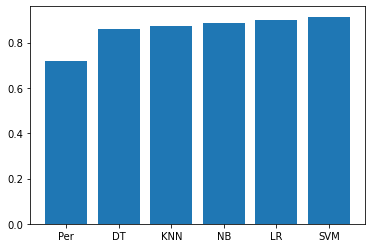

In [40]:
import matplotlib.pyplot as plt
names = list(sorted_dict.keys())
vals = list(sorted_dict.values())
plt.bar(range(len(sorted_dict)), vals, tick_label=names)
plt.show()